In [92]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [77]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [78]:
# import sqlalchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [79]:
# connect to datasource
engine = create_engine('sqlite:///Resource/hawaii.sqlite')

In [80]:
Base = automap_base()

In [81]:
# reflect database into model
Base.prepare(engine, reflect=True)

Station = Base.classes.station
Measurement = Base.classes.measurement

In [82]:
session = Session(engine)

In [83]:
# get the max date for the precipitation measurement
max_date = session.query(func.max(Measurement.date)).scalar()

# calculate the date 12 months before the last date
query_start_date = dt.datetime.fromisoformat(max_date) - dt.timedelta(days=366)

# write query results to dataframe
precip_df = pd.DataFrame(session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= query_start_date).all())
precip_df.set_index('date', inplace=True)
precip_df.sort_values('date')
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


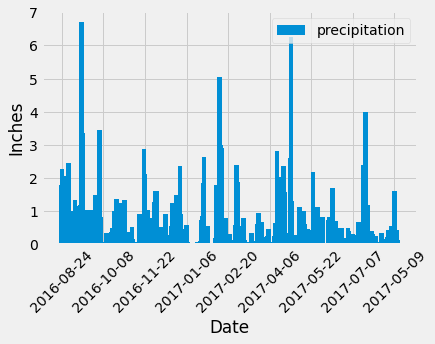

In [132]:
fig = plt.bar(precip_df.index, precip_df['prcp'], width = 5)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(['precipitation'])
plt.xticks(np.arange(1, 364, 45), rotation='45')
plt.show()